In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file
df = pd.read_csv("A:/housing_data.csv")

# Show first 5 rows
print(df.head())

# Check shape (rows, columns)
print("Shape:", df.shape)
# 1. Drop rows where all values are missing
df = df.dropna(how="all")

# 2. Fill missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  
        # Fill numeric with median
        df[col].fillna(df[col].median(), inplace=True)
    else:
        # Fill categorical with mode
        df[col].fillna(df[col].mode()[0], inplace=True)

# 3. Remove duplicate rows
df = df.drop_duplicates()

# 4. Handle anomalies (remove negative values in numeric columns if not logical)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df = df[df[col] >= 0]

# ---- Results ----
print("Data cleaned successfully")
print("Shape after cleaning:", df.shape)
print("Remaining missing values:\n", df.isnull().sum().sum())

# Set style for seaborn
sns.set(style="whitegrid",font_scale=1.1)

   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCo

C:\Users\Avi\AppData\Local\Temp\ipykernel_13528\201833972.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Avi\AppData\Local\Temp\ipykernel_13528\201833972.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

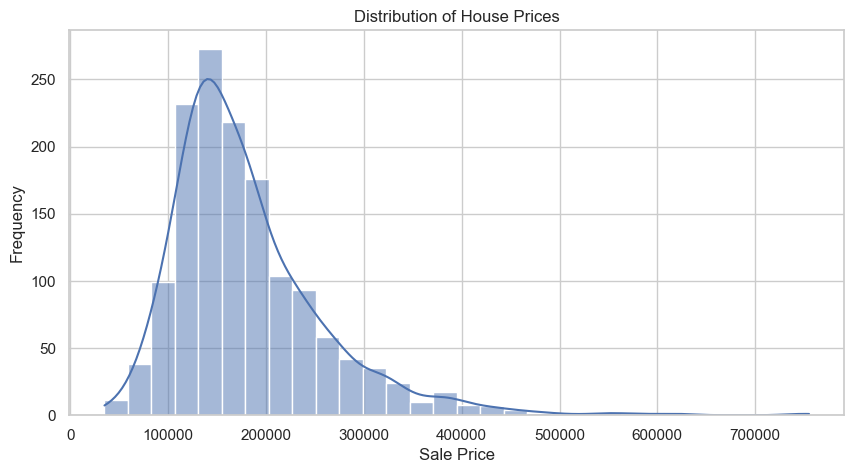

In [6]:
# Explore distribution of 'SalePrice'
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

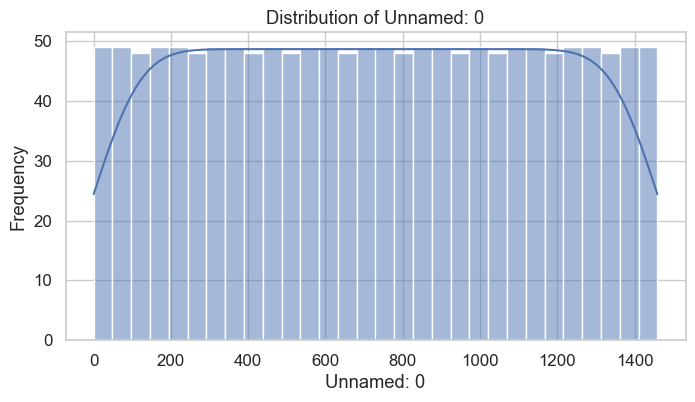

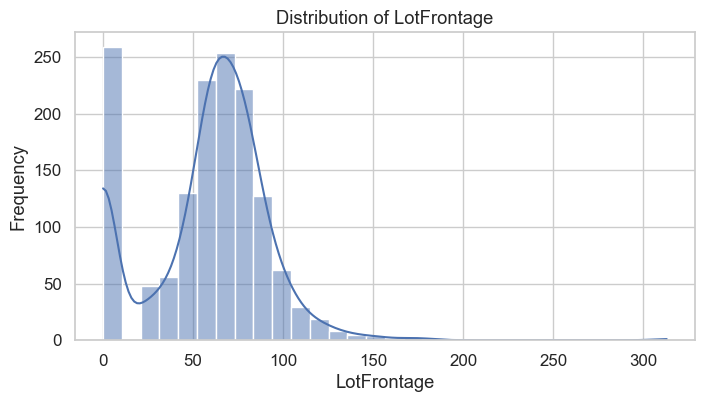

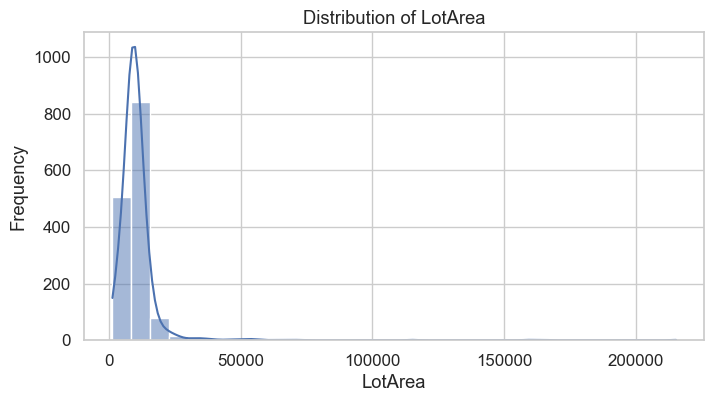

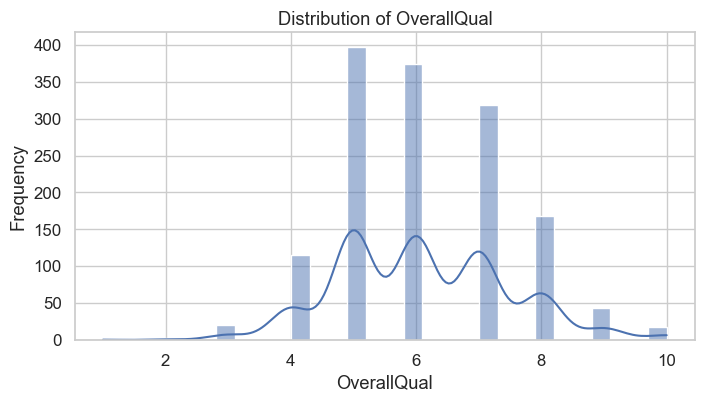

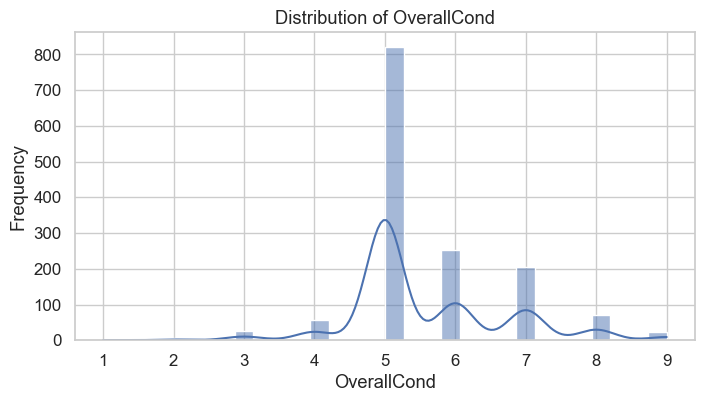

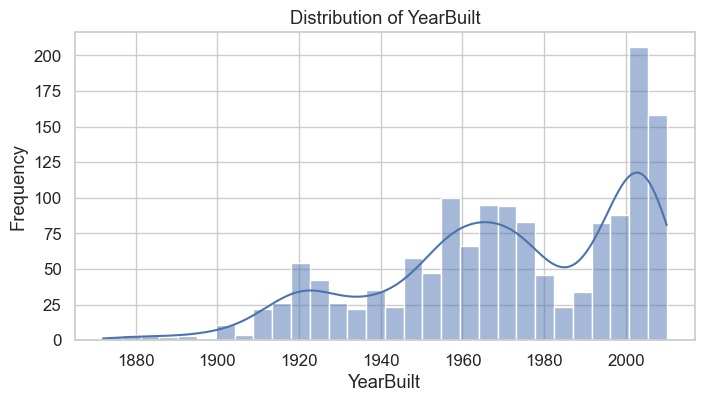

In [4]:
# Explore numeric variables (histograms + KDE)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols[:6]:  # show first 6 variables for example
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

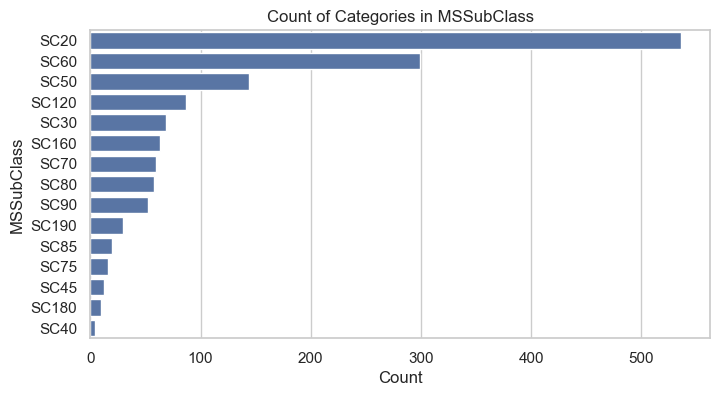

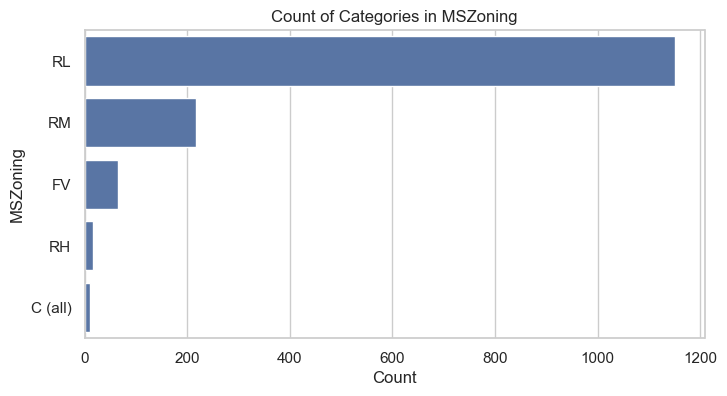

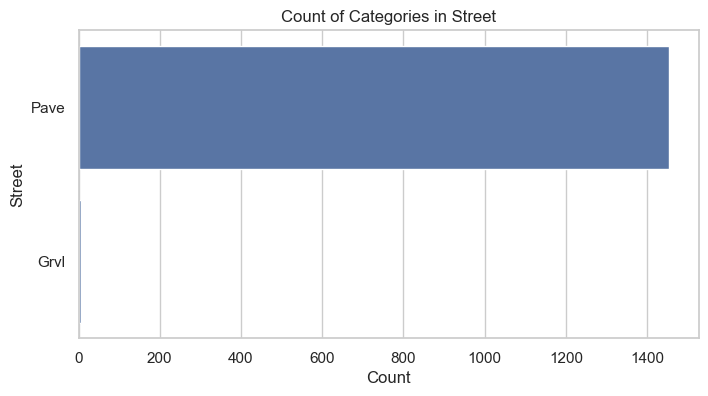

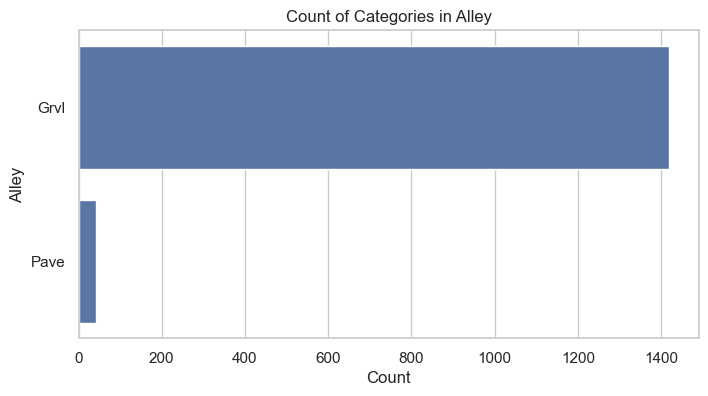

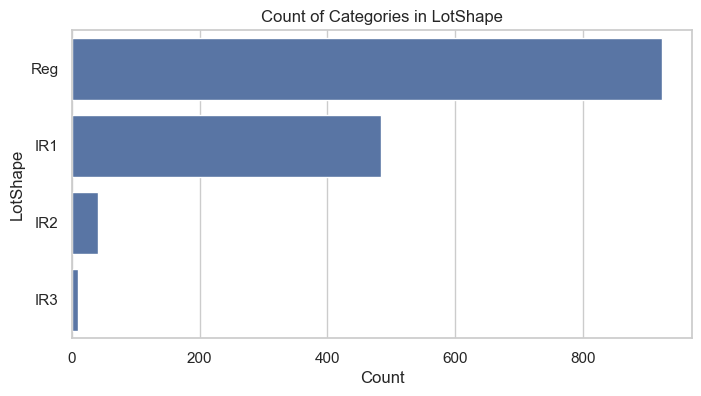

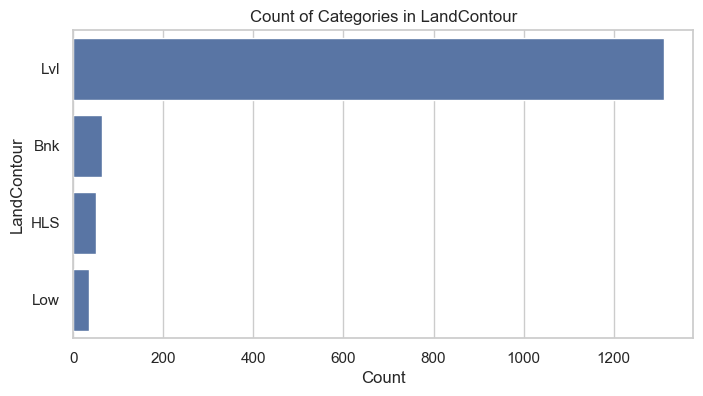

In [10]:
# Explore categorical variables (bar plots)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols[:6]:  # show first 6 categorical variables
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of Categories in {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

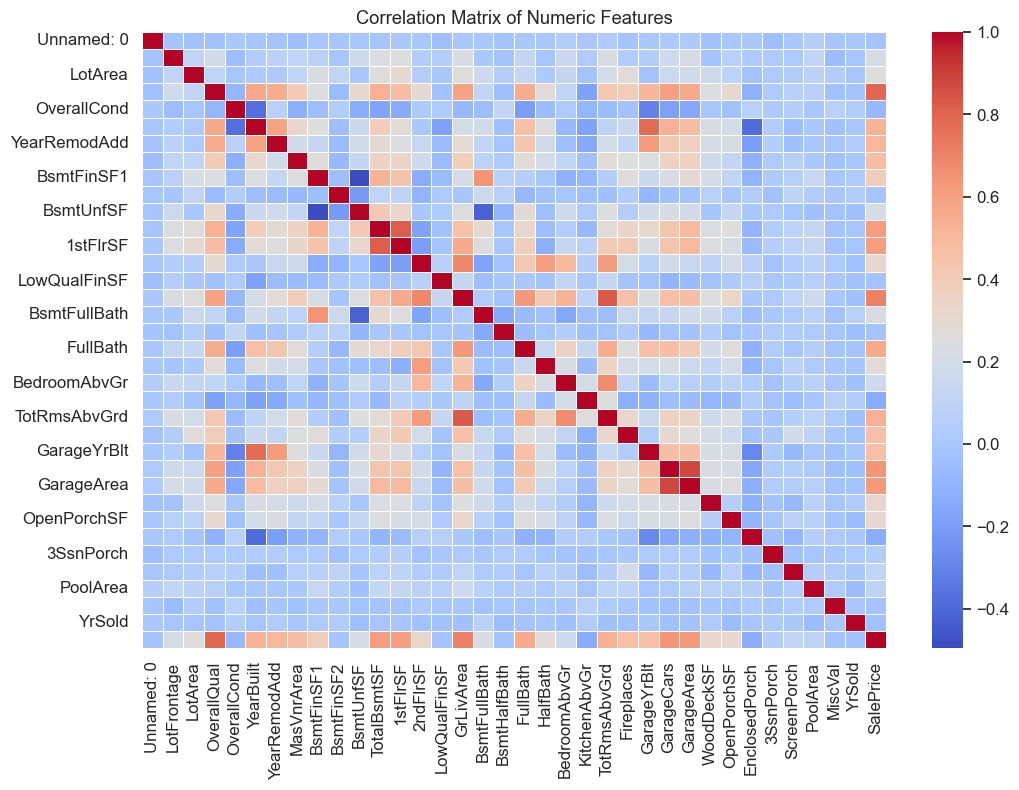

In [13]:
# 1. Correlation Matrix (numeric variables only)
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)   # correlation only for numeric cols
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


C:\Users\Avi\AppData\Local\Temp\ipykernel_14500\2752438359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr, y=price_corr.index, palette="viridis")


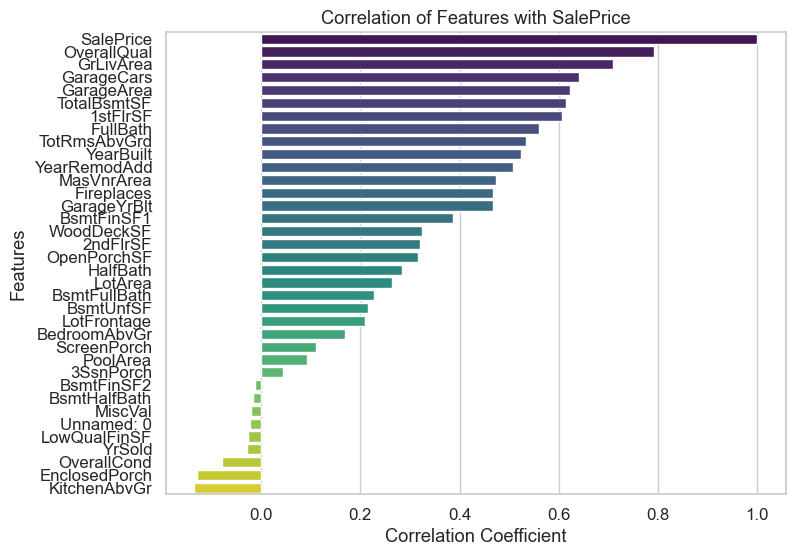

In [14]:
# Focus on correlation with SalePrice
plt.figure(figsize=(8,6))
price_corr = corr["SalePrice"].sort_values(ascending=False)
sns.barplot(x=price_corr, y=price_corr.index, palette="viridis")
plt.title("Correlation of Features with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

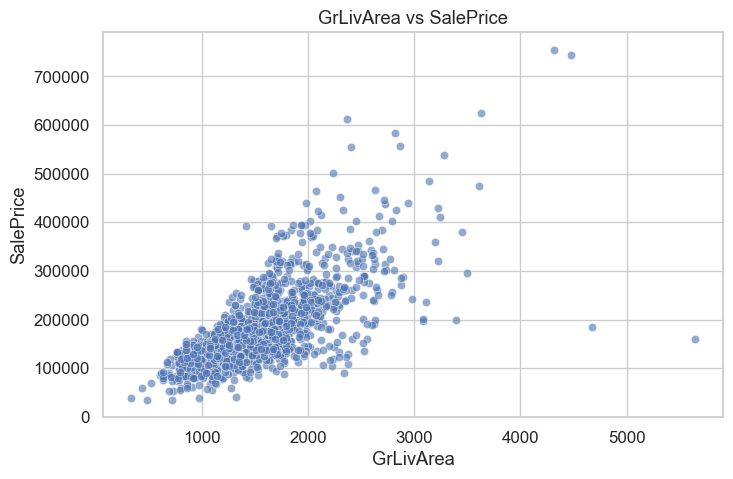

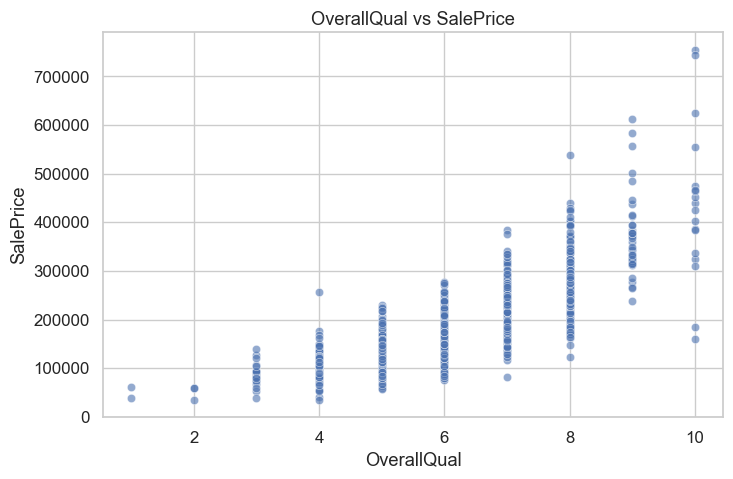

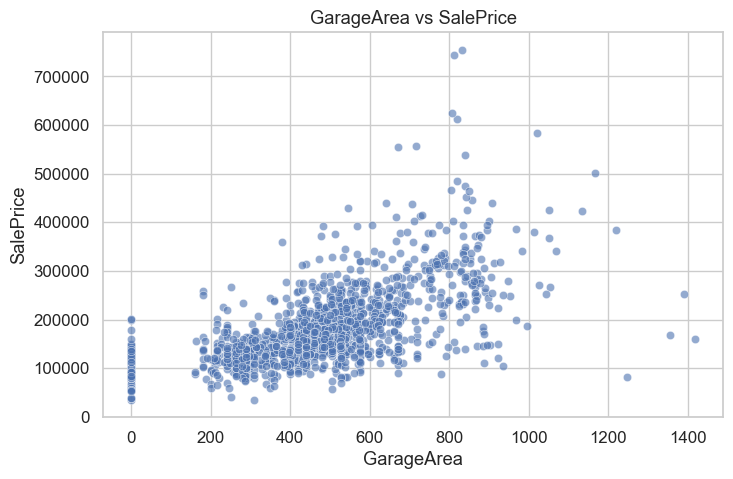

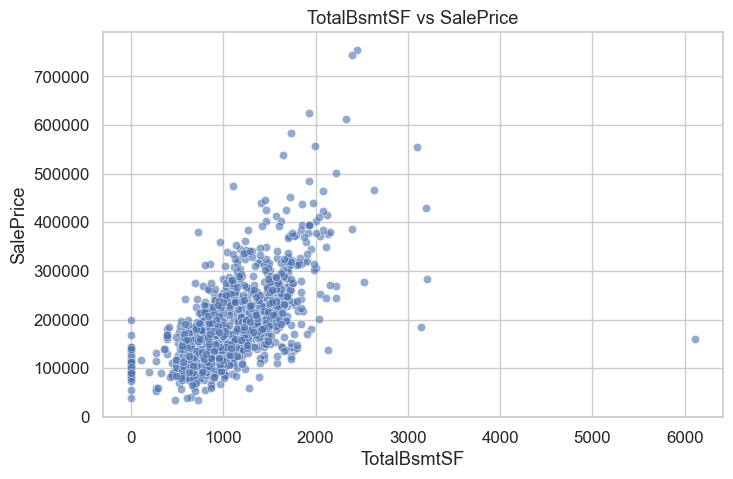

In [15]:
# 2. Scatter Plots for Key Relationships
key_features = ["GrLivArea", "OverallQual", "GarageArea", "TotalBsmtSF"]

for col in key_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[col], y=df["SalePrice"], alpha=0.6)
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

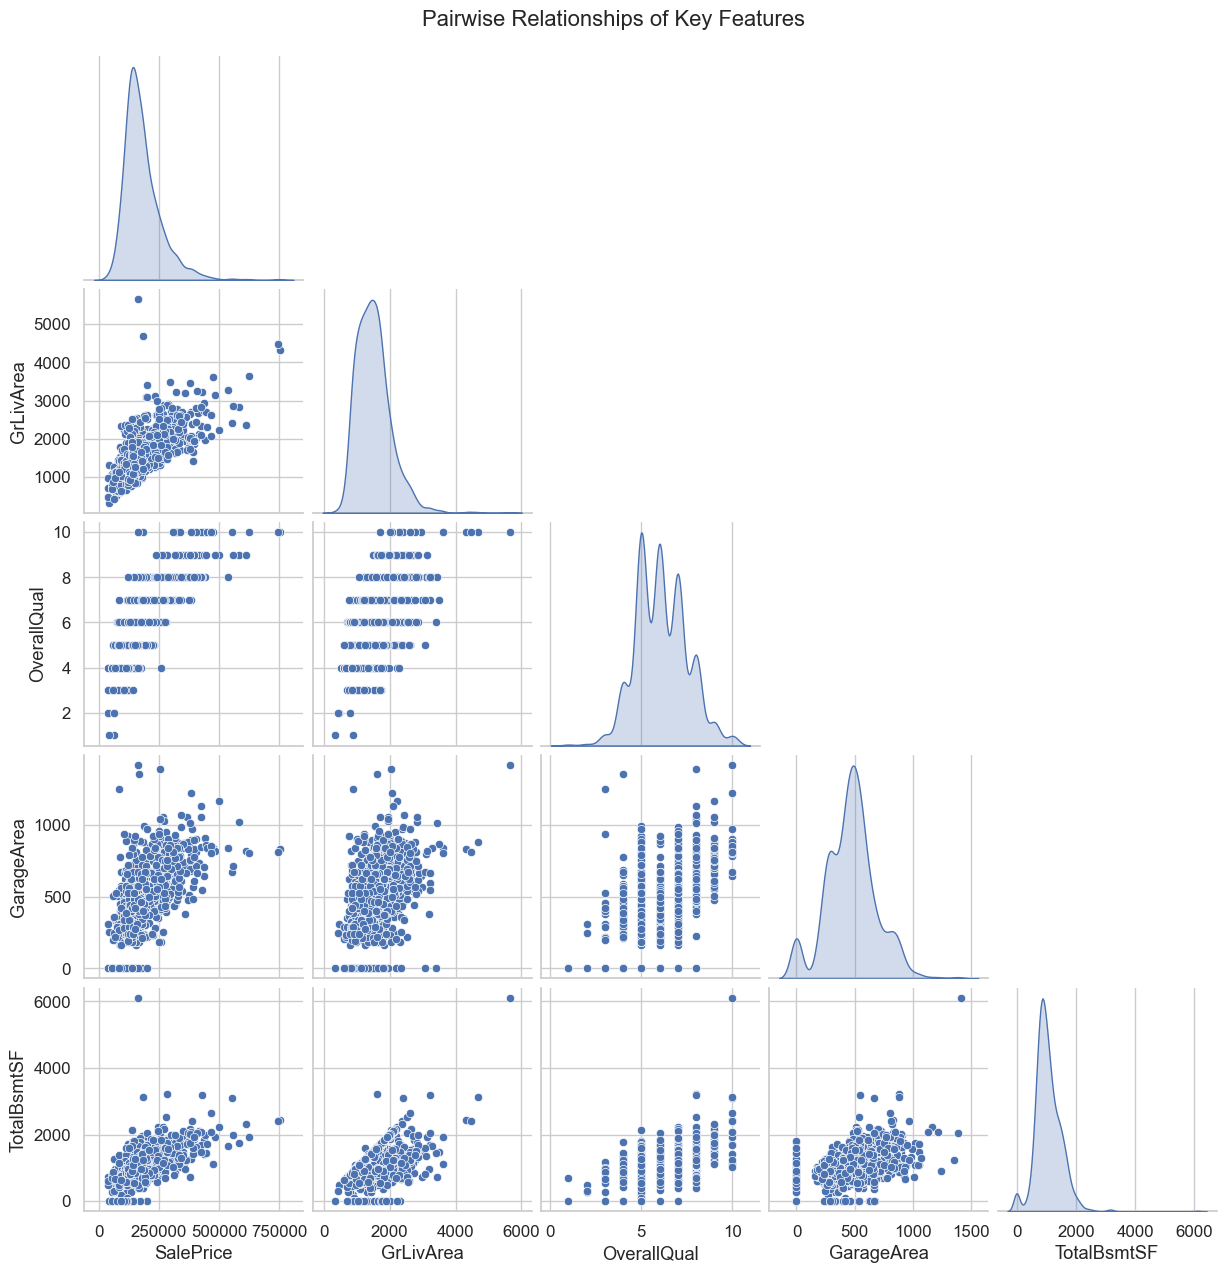

In [16]:
# 3. Pairplot (only subset of features to avoid heavy plots)
selected = df[["SalePrice", "GrLivArea", "OverallQual", "GarageArea", "TotalBsmtSF"]]
sns.pairplot(selected, diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships of Key Features", y=1.02)
plt.show()

In [6]:
# Feature Engineering 

# 1. Price per square foot (if area available)
if "GrLivArea" in df.columns and "SalePrice" in df.columns:
    df["PricePerSqFt"] = df["SalePrice"] / df["GrLivArea"]

# 2. Age of the property at time of sale
if "YrSold" in df.columns and "YearBuilt" in df.columns:
    df["HouseAge"] = df["YrSold"] - df["YearBuilt"]

# 3. Age since last remodel
if "YearRemodAdd" in df.columns and "YrSold" in df.columns:
    df["YearsSinceRemodel"] = df["YrSold"] - df["YearRemodAdd"]

# 4. Total bathrooms (full + half as 0.5)
if {"FullBath", "HalfBath"}.issubset(df.columns):
    df["TotalBathrooms"] = df["FullBath"] + (0.5 * df["HalfBath"])

# 5. Total porch area (sum of different porch-related columns if they exist)
porch_cols = ["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]
df["TotalPorchSF"] = df[porch_cols].sum(axis=1) if set(porch_cols).issubset(df.columns) else 0

# 6. Total square footage (living + basement)
if {"GrLivArea", "TotalBsmtSF"}.issubset(df.columns):
    df["TotalSF"] = df["GrLivArea"] + df["TotalBsmtSF"]

# ---- Save enhanced dataset ----
df.to_csv("housing_data_feature_engineered.csv", index=False)

print(" Feature engineering complete!")
print("New features created: PricePerSqFt, HouseAge, YearsSinceRemodel, TotalBathrooms, TotalPorchSF, TotalSF")

 Feature engineering complete!
New features created: PricePerSqFt, HouseAge, YearsSinceRemodel, TotalBathrooms, TotalPorchSF, TotalSF


C:\Users\Avi\AppData\Local\Temp\ipykernel_14500\2827535652.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df, palette="coolwarm")


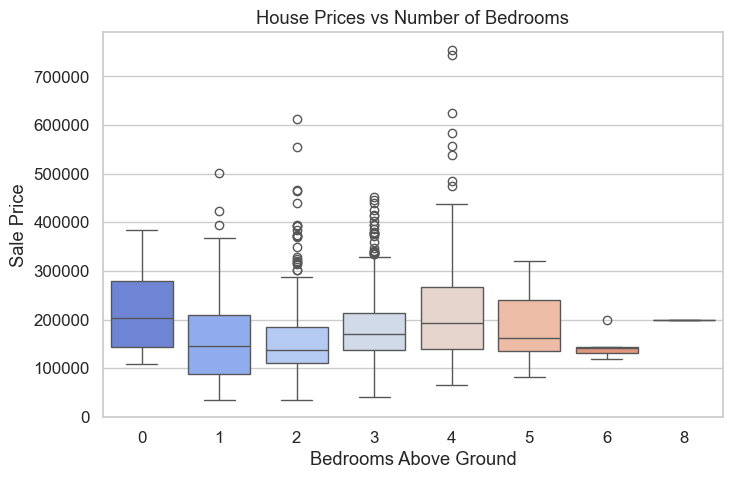

C:\Users\Avi\AppData\Local\Temp\ipykernel_14500\2827535652.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TotalBathrooms", y="SalePrice", data=df, palette="viridis")


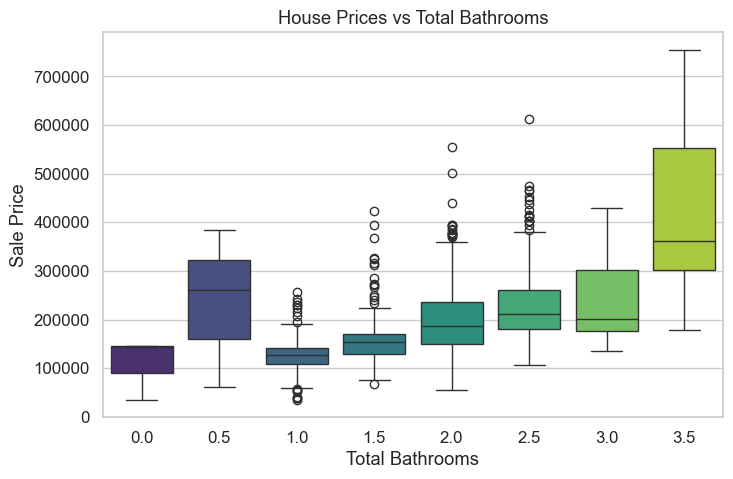

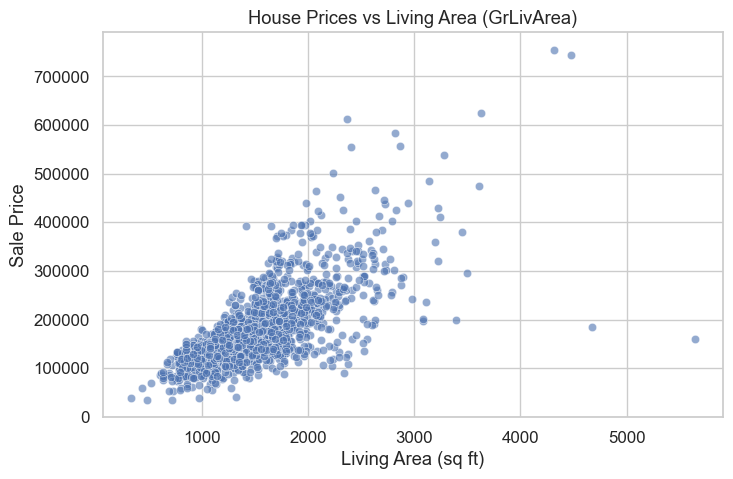

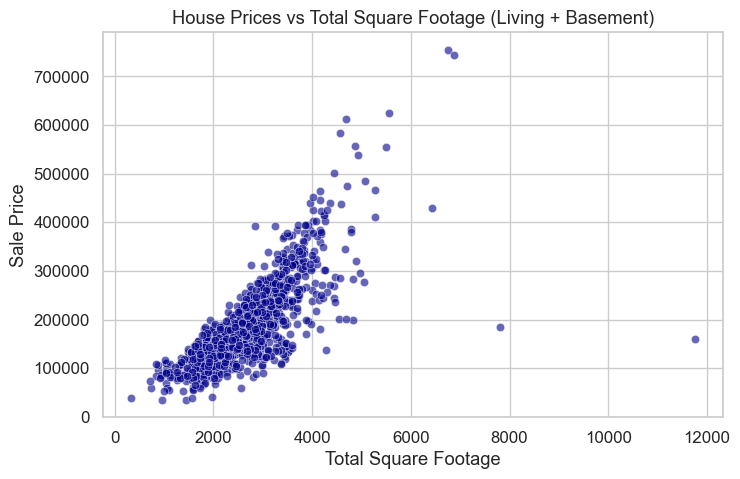

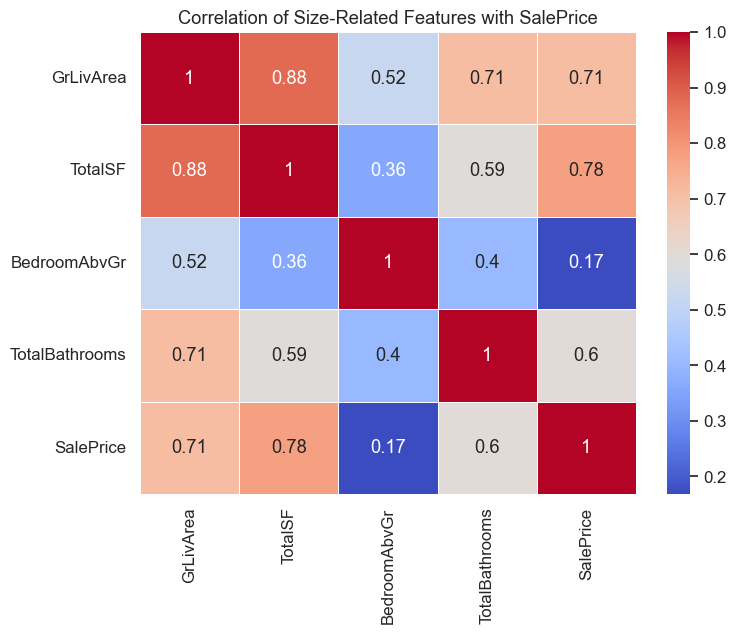

In [19]:
# Load feature engineered dataset
df = pd.read_csv("housing_data_feature_engineered.csv")

sns.set(style="whitegrid", font_scale=1.1)

# ---- 1. Bedrooms vs House Price ----
plt.figure(figsize=(8,5))
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df, palette="coolwarm")
plt.title("House Prices vs Number of Bedrooms")
plt.xlabel("Bedrooms Above Ground")
plt.ylabel("Sale Price")
plt.show()

# ---- 2. Bathrooms vs House Price ----
plt.figure(figsize=(8,5))
sns.boxplot(x="TotalBathrooms", y="SalePrice", data=df, palette="viridis")
plt.title("House Prices vs Total Bathrooms")
plt.xlabel("Total Bathrooms")
plt.ylabel("Sale Price")
plt.show()

# ---- 3. Square Footage (GrLivArea) vs Sale Price ----
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df, alpha=0.6)
plt.title("House Prices vs Living Area (GrLivArea)")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

# ---- 4. Combined Size (TotalSF) vs Sale Price ----
if "TotalSF" in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x="TotalSF", y="SalePrice", data=df, alpha=0.6, color="darkblue")
    plt.title("House Prices vs Total Square Footage (Living + Basement)")
    plt.xlabel("Total Square Footage")
    plt.ylabel("Sale Price")
    plt.show()

# ---- 5. Correlation of Size Features with SalePrice ----
size_features = ["GrLivArea", "TotalSF", "BedroomAbvGr", "TotalBathrooms"]
corr = df[size_features + ["SalePrice"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Size-Related Features with SalePrice")
plt.show()

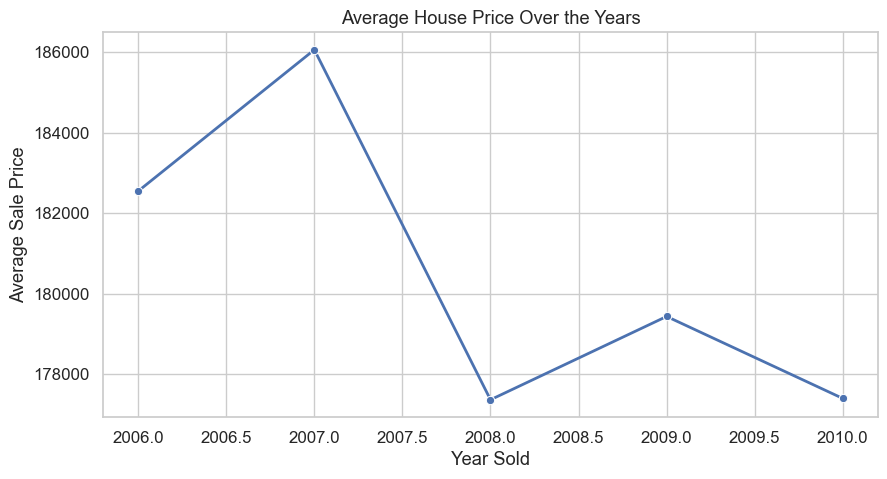

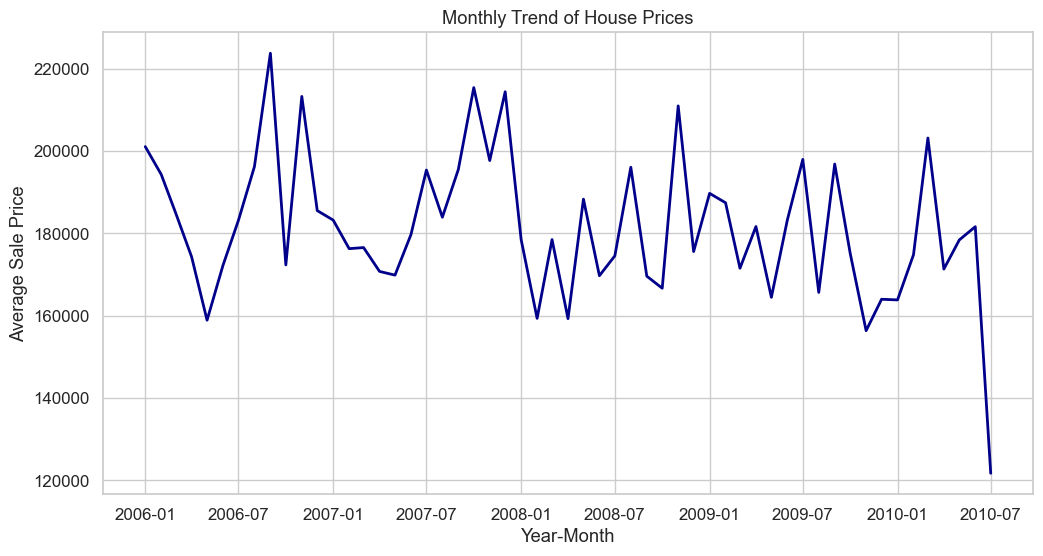

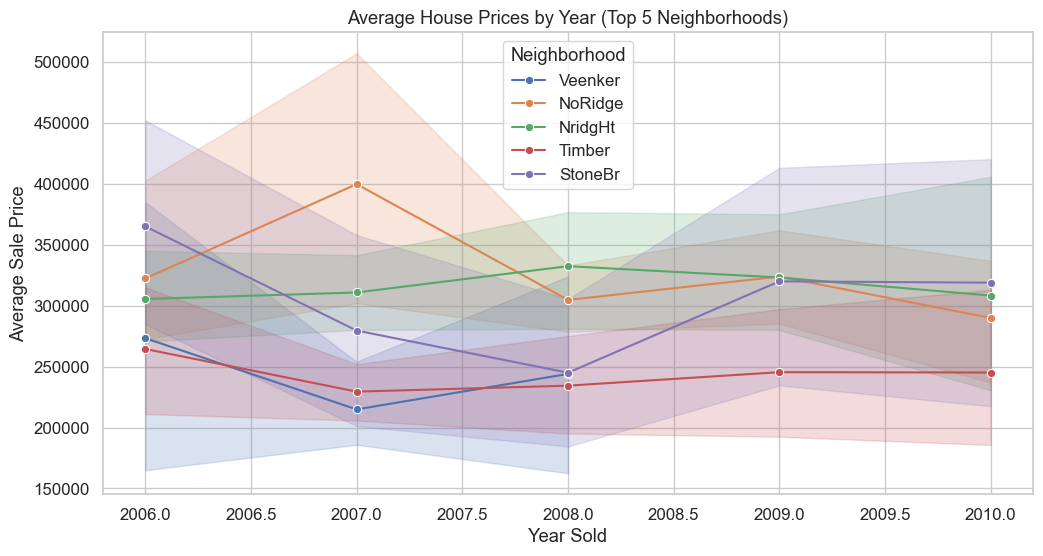

In [20]:
# 1. Average Sale Price per Year 
plt.figure(figsize=(10,5))
yearly_avg = df.groupby("YrSold")["SalePrice"].mean()
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker="o", linewidth=2)
plt.title("Average House Price Over the Years")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price")
plt.show()

# ---- 2. Average Sale Price per Month-Year ----
if {"YrSold", "MoSold"}.issubset(df.columns):
    df["SaleDate"] = pd.to_datetime(df["YrSold"].astype(str) + "-" + df["MoSold"].astype(str) + "-01")
    monthly_avg = df.groupby("SaleDate")["SalePrice"].mean()

    plt.figure(figsize=(12,6))
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, linewidth=2, color="darkblue")
    plt.title("Monthly Trend of House Prices")
    plt.xlabel("Year-Month")
    plt.ylabel("Average Sale Price")
    plt.show()

# 3. Price Trends by Neighborhood (Top 5) 
if "Neighborhood" in df.columns:
    top_neighborhoods = df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).head(5).index
    subset = df[df["Neighborhood"].isin(top_neighborhoods)]

    plt.figure(figsize=(12,6))
    sns.lineplot(x="YrSold", y="SalePrice", hue="Neighborhood", data=subset, estimator="mean", marker="o")
    plt.title("Average House Prices by Year (Top 5 Neighborhoods)")
    plt.xlabel("Year Sold")
    plt.ylabel("Average Sale Price")
    plt.legend(title="Neighborhood")
    plt.show()




C:\Users\Avi\AppData\Local\Temp\ipykernel_14500\2000029932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HasPool", y="SalePrice", data=df, palette="coolwarm")


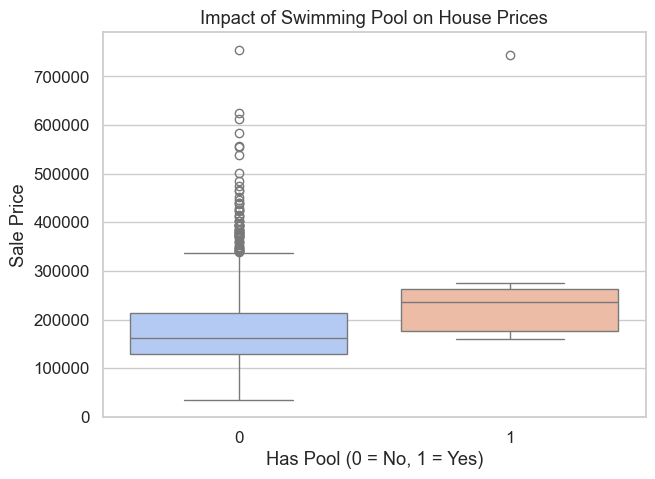

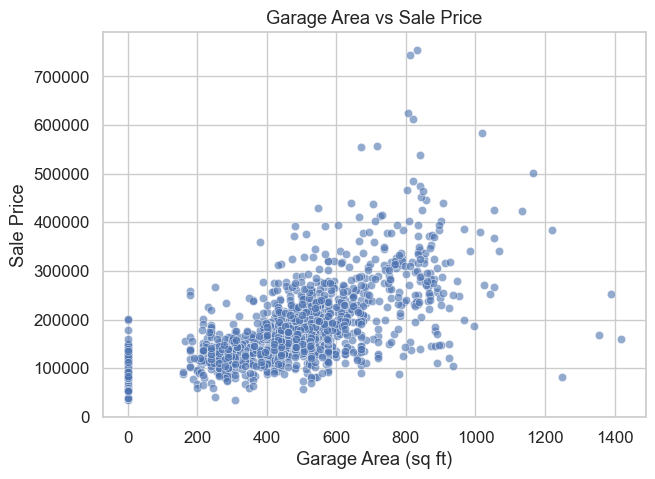

C:\Users\Avi\AppData\Local\Temp\ipykernel_14500\2000029932.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="GarageCars", y="SalePrice", data=df, palette="viridis")


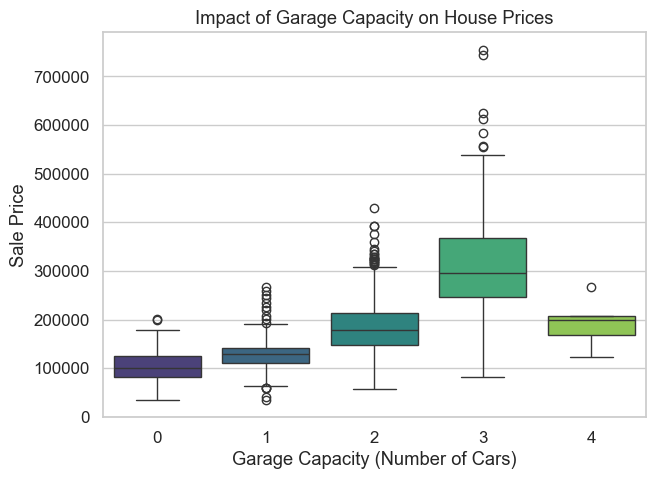

C:\Users\Avi\AppData\Local\Temp\ipykernel_14500\2000029932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fireplaces", y="SalePrice", data=df, palette="magma")


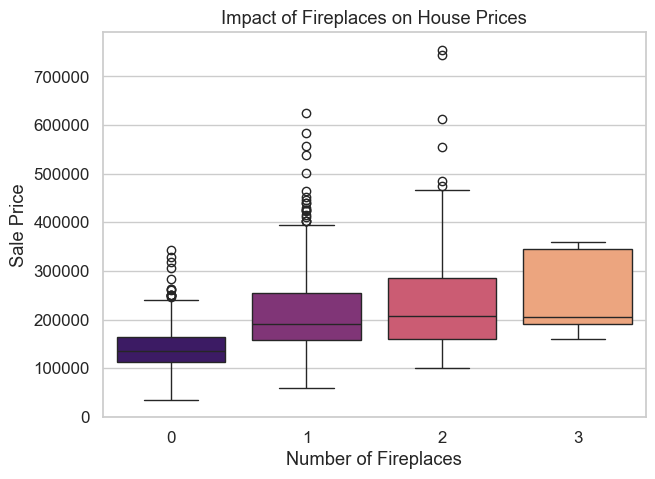

C:\Users\Avi\AppData\Local\Temp\ipykernel_14500\2000029932.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CentralAir", y="SalePrice", data=df, palette="Set2")


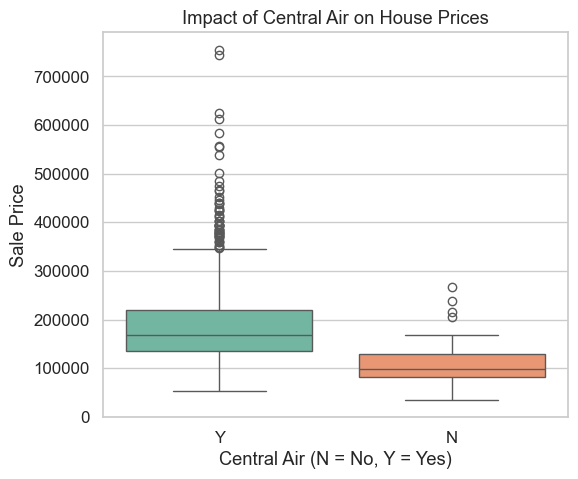

In [24]:
# ---- 1. Swimming Pool Impact ----
if "PoolArea" in df.columns:
    df["HasPool"] = df["PoolArea"].apply(lambda x: 1 if x > 0 else 0)
    plt.figure(figsize=(7,5))
    sns.boxplot(x="HasPool", y="SalePrice", data=df, palette="coolwarm")
    plt.title("Impact of Swimming Pool on House Prices")
    plt.xlabel("Has Pool (0 = No, 1 = Yes)")
    plt.ylabel("Sale Price")
    plt.show()

# ---- 2. Garage Impact ----
if "GarageArea" in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x="GarageArea", y="SalePrice", data=df, alpha=0.6)
    plt.title("Garage Area vs Sale Price")
    plt.xlabel("Garage Area (sq ft)")
    plt.ylabel("Sale Price")
    plt.show()

if "GarageCars" in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="GarageCars", y="SalePrice", data=df, palette="viridis")
    plt.title("Impact of Garage Capacity on House Prices")
    plt.xlabel("Garage Capacity (Number of Cars)")
    plt.ylabel("Sale Price")
    plt.show()
# ---- 3. Fireplace Impact ----
if "Fireplaces" in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="Fireplaces", y="SalePrice", data=df, palette="magma")
    plt.title("Impact of Fireplaces on House Prices")
    plt.xlabel("Number of Fireplaces")
    plt.ylabel("Sale Price")
    plt.show()

#  4. Central Air Impact 
if "CentralAir" in df.columns:
    plt.figure(figsize=(6,5))
    sns.boxplot(x="CentralAir", y="SalePrice", data=df, palette="Set2")
    plt.title("Impact of Central Air on House Prices")
    plt.xlabel("Central Air (N = No, Y = Yes)")
    plt.ylabel("Sale Price")
    plt.show()

In [25]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
#import pikle

Shape of dataset: (1460, 88)
Columns: ['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3